# Assignment 2 - Data Set Description
The questions below relate to the data files associated with the contest with the title 'DengAI: Predicting Disease Spread' published at the following website. 
https://www.drivendata.org/competitions/44/dengai-predicting-disease-spread/data/

Anyone can join the contest and showcase your skills. To know about contest submissions visit the following webpage
https://www.drivendata.org/competitions/44/dengai-predicting-disease-spread/submissions/
You can showcase your Machine Learning skills by ranking top in the contest. 

Problem description:
Your goal is to predict the total_cases label for each (city, year, weekofyear) in the test set. There are two cities, San Juan and Iquitos, with test data for each city spanning 5 and 3 years respectively. You will make one submission that contains predictions for both cities. The data for each city have been concatenated along with a city column indicating the source: sj for San Juan and iq for Iquitos. The test set is a pure future hold-out, meaning the test data are sequential and non-overlapping with any of the training data. Throughout, missing values have been filled as NaNs.

Assignment:
The goal is achieved through three subsequent Assignments 1, 2 and 3, all using the same dataset


The features in this dataset
You are provided the following set of information on a (year, weekofyear) timescale:

(Where appropriate, units are provided as a _unit suffix on the feature name.)

City and date indicators

    city – City abbreviations: sj for San Juan and iq for Iquitos
    week_start_date – Date given in yyyy-mm-dd format

NOAA's GHCN daily climate data weather station measurements

    station_max_temp_c – Maximum temperature
    station_min_temp_c – Minimum temperature
    station_avg_temp_c – Average temperature
    station_precip_mm – Total precipitation
    station_diur_temp_rng_c – Diurnal temperature range
    
PERSIANN satellite precipitation measurements (0.25x0.25 degree scale)

    precipitation_amt_mm – Total precipitation

NOAA's NCEP Climate Forecast System Reanalysis measurements (0.5x0.5 degree scale)

    reanalysis_sat_precip_amt_mm – Total precipitation
    reanalysis_dew_point_temp_k – Mean dew point temperature
    reanalysis_air_temp_k – Mean air temperature
    reanalysis_relative_humidity_percent – Mean relative humidity
    reanalysis_specific_humidity_g_per_kg – Mean specific humidity
    reanalysis_precip_amt_kg_per_m2 – Total precipitation
    reanalysis_max_air_temp_k – Maximum air temperature
    reanalysis_min_air_temp_k – Minimum air temperature
    reanalysis_avg_temp_k – Average air temperature
    reanalysis_tdtr_k – Diurnal temperature range

Satellite vegetation - Normalized difference vegetation index (NDVI) - NOAA's CDR Normalized Difference Vegetation Index (0.5x0.5 degree scale) measurements

    ndvi_se – Pixel southeast of city centroid
    ndvi_sw – Pixel southwest of city centroid
    ndvi_ne – Pixel northeast of city centroid
    ndvi_nw – Pixel northwest of city centroid

# Assignment 2 - Questions
Use the merged data frame from Assignment 1 for this assignment
This Assignment focuses on data preprocessing and model building. Continue with the datasets loaded in Assignment 1 (or reload with same steps and create merged data frame) and Make a stratified 80-20 split based on target to ensure there are no biases in the dataset. Predict the "total_cases" using a stochastic gradient descent regressor. Calculate the Root Mean Square Error. Also, plot Learning Curve for the model. Provide your intepretations based on these metrics.

**The first part of code is as show below-
the merged dataframe from assignment one**

Code from Assignment one

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#Set working directory
#The first dataframe as csv
df1 = pd.read_csv('dengue_features_train.csv')

In [39]:
df1.columns = df1.columns.str.replace('station','stn')
df1.columns = df1.columns.str.replace('reanalysis','re_an')
df1.columns = df1.columns.str.replace('humidity','hd')
df1.columns = df1.columns.str.replace('precipitation','precip')
df1.head(3)

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precip_amt_mm,re_an_air_temp_k,...,re_an_precip_amt_kg_per_m2,re_an_relative_hd_percent,re_an_sat_precip_amt_mm,re_an_specific_hd_g_per_kg,re_an_tdtr_k,stn_avg_temp_c,stn_diur_temp_rng_c,stn_max_temp_c,stn_min_temp_c,stn_precip_mm
0,sj,1990,18,30-04-1990,0.12260,0.103725,0.198483,0.177617,12.42,297.572857,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,07-05-1990,0.16990,0.142175,0.162357,0.155486,22.82,298.211429,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,14-05-1990,0.03225,0.172967,0.157200,0.170843,34.54,298.781429,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4


In [40]:
df2 = pd.read_csv('dengue_labels_train.csv')
# Merging the two dataframes
df3 = pd.merge(df1, df2, how='outer', on=['city','year','weekofyear'])
df3.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precip_amt_mm,re_an_air_temp_k,...,re_an_relative_hd_percent,re_an_sat_precip_amt_mm,re_an_specific_hd_g_per_kg,re_an_tdtr_k,stn_avg_temp_c,stn_diur_temp_rng_c,stn_max_temp_c,stn_min_temp_c,stn_precip_mm,total_cases
0,sj,1990,18,30-04-1990,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,07-05-1990,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,14-05-1990,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,21,21-05-1990,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990,22,28-05-1990,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6


In [41]:
#Counting NAN values in merged dataframe
null_columns = df3.columns[df3.isna().any()]
print("Null values count: %d"  %df3[null_columns].isna().sum().sum())

#Using forward fill to remove NAN values
df3=df3.fillna(method='ffill')

#Displaying to verify the absence of NAN values
print("Null values after forward fill: %d"  %df3[null_columns].isna().sum().sum())

Null values count: 548
Null values after forward fill: 0


In [42]:
# The below 3 columns as category
df3.city = df3.city.astype('category')
df3.year = df3.year.astype('category')
df3.week_start_date = df3.week_start_date.astype('category')


df3.dtypes

city                          category
year                          category
weekofyear                       int64
week_start_date               category
ndvi_ne                        float64
ndvi_nw                        float64
ndvi_se                        float64
ndvi_sw                        float64
precip_amt_mm                  float64
re_an_air_temp_k               float64
re_an_avg_temp_k               float64
re_an_dew_point_temp_k         float64
re_an_max_air_temp_k           float64
re_an_min_air_temp_k           float64
re_an_precip_amt_kg_per_m2     float64
re_an_relative_hd_percent      float64
re_an_sat_precip_amt_mm        float64
re_an_specific_hd_g_per_kg     float64
re_an_tdtr_k                   float64
stn_avg_temp_c                 float64
stn_diur_temp_rng_c            float64
stn_max_temp_c                 float64
stn_min_temp_c                 float64
stn_precip_mm                  float64
total_cases                      int64
dtype: object

In [43]:
# Displaying the first 10 rows 
df3.head(10)

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precip_amt_mm,re_an_air_temp_k,...,re_an_relative_hd_percent,re_an_sat_precip_amt_mm,re_an_specific_hd_g_per_kg,re_an_tdtr_k,stn_avg_temp_c,stn_diur_temp_rng_c,stn_max_temp_c,stn_min_temp_c,stn_precip_mm,total_cases
0,sj,1990,18,30-04-1990,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,07-05-1990,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,14-05-1990,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,21,21-05-1990,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990,22,28-05-1990,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6
5,sj,1990,23,04-06-1990,0.196200,0.174850,0.254314,0.181743,9.58,299.630000,...,79.891429,9.58,17.212857,2.100000,28.114286,6.942857,34.4,23.9,39.1,2
6,sj,1990,24,11-06-1990,0.112900,0.092800,0.205071,0.210271,3.48,299.207143,...,82.000000,3.48,17.234286,2.042857,27.414286,6.771429,32.2,23.3,29.7,4
7,sj,1990,25,18-06-1990,0.072500,0.072500,0.151471,0.133029,151.12,299.591429,...,83.375714,151.12,17.977143,1.571429,28.371429,7.685714,33.9,22.8,21.1,5
8,sj,1990,26,25-06-1990,0.102450,0.146175,0.125571,0.123600,19.32,299.578571,...,82.768571,19.32,17.790000,1.885714,28.328571,7.385714,33.9,22.8,21.1,10
9,sj,1990,27,02-07-1990,0.102450,0.121550,0.160683,0.202567,14.41,300.154286,...,81.281429,14.41,18.071429,2.014286,28.328571,6.514286,33.9,24.4,1.1,6


<ul>
    <li>Import the required libraries</li>
    <li>Make an 80-20 stratified split based on the target data</li>
    <li>Preprocess the data (Encode the  categorical features and Standardize the numerical features)</li>
    <li>Build a stochastic gradient descent regressor, train the model </li>
    <li>Evaluate your model based on applicable metrics. Show the metric(s) you chose and why you chose this(these) metrics.</li>
    <li>List the hyper-parameters that can be tuned in SGD. Show the code along with comments on the parameter value chosen (use class presentation, discussion notes, some online reading) and why this value was chosen. Show the improvement you achieved in model accuracy.  </li>
    <li>Plot Learning curve and provide insights</li>
    <li>Create a submission file which has predictions for both cities in the submission format prescribed by the contest at the link https://www.drivendata.org/competitions/44/dengai-predicting-disease-spread/data/</li>
    <li>Optional: Submit your predictions to the contest. You will get a submission score. Update it here. As you improve your model in next assignments, you can try to improve this score.</li>
</ul>

Submit the following for this assignment: 
1. .ipynb and .html formats of Jupyter notebook code with outputs and 
2. the submission_format.csv with your predictions

In [44]:
# Importing the necessary libraries
from sklearn.model_selection import StratifiedKFold
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from numpy import absolute, mean, std 
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, explained_variance_score, max_error, r2_score
from sklearn.model_selection import learning_curve

In [45]:
# Independent variables and dependent variables and placed them into X and y respectively from the merged df
# Removing the "week_start_date" as we have separate columns for the year and the week
# Also removing "total_cases" as it will be the target variable and placing it in a new variable y
X = df3.drop(['total_cases','week_start_date'], axis = 1)
y = df3['total_cases']

In [46]:
# Since the y values have unique values, it is not possible to achieve a stratified split.
# Hence made 50 bins between 0 and 47 as shown below-
bins = np.linspace(0, 47, 50)
y_bin = np.digitize(y, bins)

In [47]:
# Stratified 80-20 train test split
x_train, x_test, y_train, y_test = train_test_split( X,y_bin,
                        shuffle = True,test_size=0.2, stratify = y_bin)

In [48]:
# assigning preprocessing modules to variables
scaler = StandardScaler()
le = LabelEncoder() 

In [49]:
# Fitting the categorical variables using label_encoder on the train and test data
x_train['city']= le.fit_transform(x_train['city']) 
x_train['year']= le.fit_transform(x_train['year']) 

x_test['city']= le.fit_transform(x_test['city']) 
x_test['year']= le.fit_transform(x_test['year']) 

C:\Users\RajKumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\RajKumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\RajKumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

In [50]:
# Fitting the numerical variables using StandardScaler on the train and test data
x_train = pd.DataFrame(scaler.fit_transform(x_train), columns=x_train.columns )
x_test = pd.DataFrame(scaler.fit_transform(x_test), columns=x_test.columns )

In [51]:
# Introducing the stochastic gradient descent regressor to train the model
sgd = linear_model.SGDRegressor(max_iter=10000, penalty='elasticnet',learning_rate="adaptive")
type(sgd)

sklearn.linear_model.stochastic_gradient.SGDRegressor

In [52]:
# Fitting the data
sgd.fit(x_train, y_train)

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='adaptive', loss='squared_loss', max_iter=10000,
             n_iter_no_change=5, penalty='elasticnet', power_t=0.25,
             random_state=None, shuffle=True, tol=0.001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [53]:
# Predicting the y values using train and test data
y_pred = sgd.predict(x_test)
y_train_pred = sgd.predict(x_train)

In [54]:
#Model score, mean absolute error mean square errors for train and test predictions 
print("Model Score: %.3f" % sgd.score(x_test, y_test))
print ("Mean Absolute Test Error: %.3f" %mean_absolute_error(y_test, y_pred))
print ("Mean Absolute Train Error: %.3f" %mean_absolute_error(y_train, y_train_pred))
print("Mean Squared Error: %.3f" % mean_squared_error(y_test, y_pred))

Model Score: 0.373
Mean Absolute Test Error: 10.137
Mean Absolute Train Error: 10.394
Mean Squared Error: 166.517


**Hyper-parameter tuning**
*changing the loss function to epsilon_insensitive. Also, keeping learning rate as adaptive learning and setting the initial learning rate eta0 to .1* 

In [55]:
sgd = linear_model.SGDRegressor(alpha = .0001,
                                loss = 'epsilon_insensitive', 
                                max_iter=10000, 
                                penalty='l1',
                                learning_rate='adaptive', eta0 = .1, power_t = .1)
sgd.fit(x_train, y_train)
y_pred = sgd.predict(x_test)
print ("Mean Absolute Test Error: %.2f" %mean_absolute_error(y_test, y_pred))

Mean Absolute Test Error: 10.15


Mean Absolute  Test error is reduced from 10.137 to 10.15 

**Hyper-parameter tuning**
*Changing the default value of epsilon.And also changing the penalty from l2 to elasticnet*

In [56]:
sgd = linear_model.SGDRegressor(alpha = .0001,
                                loss = 'epsilon_insensitive',
                                epsilon = 6,
                                max_iter=1000, 
                                penalty='elasticnet',
                                learning_rate='adaptive', eta0 = .01, power_t = .1,
                                )

sgd.fit(x_train, y_train)
y_pred = sgd.predict(x_test)
print ("Mean Absolute Test Error: %.2f" %mean_absolute_error(y_test, y_pred))

Mean Absolute Test Error: 10.01


Mean Absolute Test Error got reduced to 10.01

In [57]:
# Plotting the learning curve using Stochastic Gradient Descent Regressor
train_sizes, train_scores, test_scores = learning_curve(estimator = sgd,
                                                              X = x_train,
                                                              y = y_train, 
                                                              train_sizes = np.linspace(0.01, 1.0, 50), 
                                                              cv = 10,
                                                              scoring = 'neg_mean_squared_error')

train_scores_mean = -train_scores.mean(axis = 1)
test_scores_mean = -test_scores.mean(axis = 1)

(0, 500)

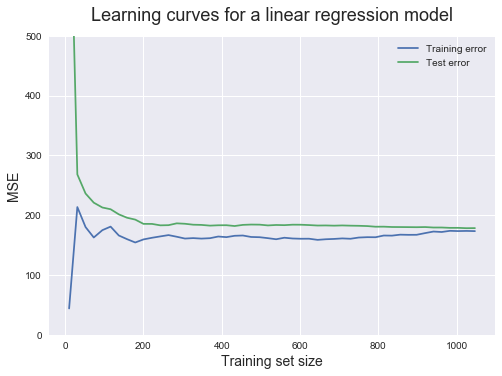

In [58]:
import matplotlib.pyplot as plt

plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, test_scores_mean, label = 'Test error')
plt.ylabel('MSE', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a linear regression model', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(0,500)

Conclusion:
1. The mean squared error is 166.517
2. The learning curve takes into account the bias and variance.
3. A narrow gap between the training and validation indicates low variance.
4. We have a low variance as the gap is less and is depicting by a high training MSE score too.
5. At start with less training instances (close to 0), the variance is high and eventually got lowered as training size increases.
6. Our learning algorithm suffers from high bias and low variance, underfitting the training data.

In [59]:
# Importing 'dengue_features_test.csv' from the website
df_test = pd.read_csv('dengue_features_test.csv')

#forward fill to handle null values
df_test=df_test.fillna(method='ffill')

# Dropping 'week_start_date' 
df_test = df_test.drop(['week_start_date'], axis = 1)

# Label encoding and scaling numerical values
df_test['city']= le.fit_transform(df_test['city']) 
df_test['year']= le.fit_transform(df_test['year']) 
df_test = pd.DataFrame(scaler.transform(df_test), columns=df_test.columns )

# Predicting the target value 'total_cases'
y_test_pred = sgd.predict(df_test)
final_pred = y_test_pred.astype(int)

In [60]:
# Converting the predicted values to panda series and further into a dataframe
Series_new = pd.Series(final_pred)
pred = Series_new.to_frame(name='total_cases')
pred

,total_cases
0,25
1,28
2,26
3,25
4,28
5,27
6,31
7,29
8,32
9,33


In [61]:
# Importing 'submission_format.csv' and dropping the 'total_cases' column.
df_submission = pd.read_csv('submission_format.csv')
df_submission = df_submission.drop(['total_cases'], axis = 1)

In [62]:
# Data frame which predicted total_cases corresponding to each city, year and week_of_year
final_predictions = pd.merge(df_submission, pred, how="inner", left_index=True, right_index=True)
final_predictions

,city,year,weekofyear,total_cases
0,sj,2008,18,25
1,sj,2008,19,28
2,sj,2008,20,26
3,sj,2008,21,25
4,sj,2008,22,28
5,sj,2008,23,27
6,sj,2008,24,31
7,sj,2008,25,29
8,sj,2008,26,32
9,sj,2008,27,33


In [64]:
# FInally, loading the dataframe to csv
final_predictions.to_csv(r'C:\Users\RajKumar\Downloads\Data Science Programming ISM 6251\Pred_submit.csv', index = False)